In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL3RyZXZvcm1hcnRpbi9HaXRfVHJhY2tlZC9DRkEvRk9SRUNBU1RJTkdfUElQRUxJTkVTX0FORF9NQUlOVEFJTkVOQ0UvZm9yZWNhc3R0b29scy1weS9kb2NzL3R1dG9yaWFscw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap.py": 1733252688.0, "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap_external.py": 1733252688.0, "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/zipimport.py": 1733252687.0, "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/codecs.py": 1733252687.0, "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/aliases.py": 1733252688.0, "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/__init__.py": 1733252688.0, "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/utf_8.py": 1733252688.0, "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/abc.py": 1733252687.0, "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/io.py": 1733252687.0, "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/stat.py": 1733252687.0, "/Libr

In [2]:
# Dependencies
import arviz as az
import numpyro
import jax.numpy as jnp
import numpyro.distributions as dist
from jax import random
from numpyro.infer import NUTS

import forecasttools.sbc as sbc

In [3]:
rng_key = random.PRNGKey(0)
J = 8
y = jnp.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = jnp.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])

In [4]:
def eight_schools_cauchy_prior(J, sigma, y=None):
    mu = numpyro.sample('mu', dist.Normal(0, 5))
    tau = numpyro.sample('tau', dist.HalfCauchy(5))
    with numpyro.plate('J', J):
        theta = numpyro.sample('theta', dist.Normal(mu, tau))
    numpyro.sample('obs', dist.Normal(theta, sigma), obs=y)

nuts_kernel_cauchy_prior = NUTS(eight_schools_cauchy_prior)

In [5]:
seed1, seed2 = random.split(rng_key)
S = sbc.SBC(nuts_kernel_cauchy_prior, J, sigma,
    observed_vars = dict(y = "obs"),
    sample_kwargs=dict(num_warmup=500, num_samples=1000, progress_bar = False),
    num_simulations=100,
    seed = seed1)

In [6]:
S.run_simulations()

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:04<07:05,  4.30s/it]

  2%|▏         | 2/100 [00:05<03:57,  2.42s/it]

  3%|▎         | 3/100 [00:06<02:52,  1.78s/it]

  4%|▍         | 4/100 [00:07<02:21,  1.47s/it]

  5%|▌         | 5/100 [00:08<02:04,  1.31s/it]

  6%|▌         | 6/100 [00:09<01:52,  1.20s/it]

  7%|▋         | 7/100 [00:10<01:46,  1.15s/it]

  8%|▊         | 8/100 [00:11<01:42,  1.11s/it]

  9%|▉         | 9/100 [00:12<01:39,  1.09s/it]

 10%|█         | 10/100 [00:13<01:35,  1.06s/it]

 11%|█         | 11/100 [00:14<01:36,  1.08s/it]

 12%|█▏        | 12/100 [00:15<01:33,  1.06s/it]

 13%|█▎        | 13/100 [00:16<01:31,  1.05s/it]

 14%|█▍        | 14/100 [00:17<01:30,  1.06s/it]

 15%|█▌        | 15/100 [00:18<01:28,  1.04s/it]

 16%|█▌        | 16/100 [00:19<01:28,  1.05s/it]

 17%|█▋        | 17/100 [00:21<01:35,  1.15s/it]

 18%|█▊        | 18/100 [00:22<01:30,  1.11s/it]

 19%|█▉        | 19/100 [00:23<01:26,  1.06s/it]

 20%|██        | 20/100 [00:24<01:22,  1.03s/it]

 21%|██        | 21/100 [00:25<01:22,  1.04s/it]

 22%|██▏       | 22/100 [00:26<01:20,  1.03s/it]

 23%|██▎       | 23/100 [00:27<01:19,  1.04s/it]

 24%|██▍       | 24/100 [00:28<01:17,  1.03s/it]

 25%|██▌       | 25/100 [00:29<01:16,  1.02s/it]

 26%|██▌       | 26/100 [00:30<01:17,  1.04s/it]

 27%|██▋       | 27/100 [00:31<01:14,  1.02s/it]

 28%|██▊       | 28/100 [00:32<01:13,  1.02s/it]

 29%|██▉       | 29/100 [00:33<01:11,  1.01s/it]

 30%|███       | 30/100 [00:34<01:10,  1.01s/it]

 31%|███       | 31/100 [00:35<01:12,  1.05s/it]

 32%|███▏      | 32/100 [00:36<01:11,  1.05s/it]

 33%|███▎      | 33/100 [00:37<01:14,  1.11s/it]

 34%|███▍      | 34/100 [00:38<01:11,  1.09s/it]

 35%|███▌      | 35/100 [00:39<01:08,  1.05s/it]

 36%|███▌      | 36/100 [00:40<01:06,  1.04s/it]

 37%|███▋      | 37/100 [00:41<01:06,  1.05s/it]

 38%|███▊      | 38/100 [00:43<01:07,  1.09s/it]

 39%|███▉      | 39/100 [00:44<01:04,  1.06s/it]

 40%|████      | 40/100 [00:45<01:02,  1.05s/it]

 41%|████      | 41/100 [00:46<01:01,  1.04s/it]

 42%|████▏     | 42/100 [00:47<00:59,  1.02s/it]

 43%|████▎     | 43/100 [00:48<00:57,  1.02s/it]

 44%|████▍     | 44/100 [00:49<00:56,  1.01s/it]

 45%|████▌     | 45/100 [00:50<00:56,  1.03s/it]

 46%|████▌     | 46/100 [00:51<00:55,  1.02s/it]

 47%|████▋     | 47/100 [00:52<00:54,  1.03s/it]

 48%|████▊     | 48/100 [00:53<00:54,  1.04s/it]

 49%|████▉     | 49/100 [00:54<00:51,  1.01s/it]

 50%|█████     | 50/100 [00:55<00:52,  1.05s/it]

 51%|█████     | 51/100 [00:56<00:51,  1.05s/it]

 52%|█████▏    | 52/100 [00:57<00:49,  1.03s/it]

 53%|█████▎    | 53/100 [00:58<00:48,  1.03s/it]

 54%|█████▍    | 54/100 [00:59<00:48,  1.05s/it]

 55%|█████▌    | 55/100 [01:00<00:46,  1.03s/it]

 56%|█████▌    | 56/100 [01:01<00:44,  1.02s/it]

 57%|█████▋    | 57/100 [01:02<00:44,  1.03s/it]

 58%|█████▊    | 58/100 [01:03<00:42,  1.02s/it]

 59%|█████▉    | 59/100 [01:04<00:41,  1.02s/it]

 60%|██████    | 60/100 [01:05<00:42,  1.06s/it]

 61%|██████    | 61/100 [01:06<00:40,  1.05s/it]

 62%|██████▏   | 62/100 [01:07<00:39,  1.03s/it]

 63%|██████▎   | 63/100 [01:08<00:37,  1.02s/it]

 64%|██████▍   | 64/100 [01:09<00:37,  1.04s/it]

 65%|██████▌   | 65/100 [01:10<00:36,  1.04s/it]

 66%|██████▌   | 66/100 [01:11<00:35,  1.03s/it]

 67%|██████▋   | 67/100 [01:12<00:33,  1.01s/it]

 68%|██████▊   | 68/100 [01:13<00:33,  1.05s/it]

 69%|██████▉   | 69/100 [01:15<00:32,  1.06s/it]

 70%|███████   | 70/100 [01:16<00:31,  1.04s/it]

 71%|███████   | 71/100 [01:17<00:29,  1.03s/it]

 72%|███████▏  | 72/100 [01:18<00:28,  1.03s/it]

 73%|███████▎  | 73/100 [01:19<00:27,  1.03s/it]

 74%|███████▍  | 74/100 [01:20<00:26,  1.02s/it]

 75%|███████▌  | 75/100 [01:21<00:25,  1.01s/it]

 76%|███████▌  | 76/100 [01:22<00:24,  1.00s/it]

 77%|███████▋  | 77/100 [01:23<00:23,  1.02s/it]

 78%|███████▊  | 78/100 [01:24<00:22,  1.01s/it]

 79%|███████▉  | 79/100 [01:25<00:21,  1.00s/it]

 80%|████████  | 80/100 [01:26<00:20,  1.01s/it]

 81%|████████  | 81/100 [01:27<00:19,  1.03s/it]

 82%|████████▏ | 82/100 [01:28<00:19,  1.08s/it]

 83%|████████▎ | 83/100 [01:29<00:18,  1.08s/it]

 84%|████████▍ | 84/100 [01:30<00:17,  1.06s/it]

 85%|████████▌ | 85/100 [01:31<00:15,  1.06s/it]

 86%|████████▌ | 86/100 [01:32<00:14,  1.05s/it]

 87%|████████▋ | 87/100 [01:33<00:13,  1.04s/it]

 88%|████████▊ | 88/100 [01:34<00:12,  1.04s/it]

 89%|████████▉ | 89/100 [01:35<00:11,  1.02s/it]

 90%|█████████ | 90/100 [01:36<00:10,  1.03s/it]

 91%|█████████ | 91/100 [01:37<00:09,  1.07s/it]

 92%|█████████▏| 92/100 [01:38<00:08,  1.05s/it]

 93%|█████████▎| 93/100 [01:39<00:07,  1.02s/it]

 94%|█████████▍| 94/100 [01:40<00:06,  1.02s/it]

 95%|█████████▌| 95/100 [01:41<00:05,  1.02s/it]

 96%|█████████▌| 96/100 [01:42<00:04,  1.06s/it]

 97%|█████████▋| 97/100 [01:43<00:03,  1.04s/it]

 98%|█████████▊| 98/100 [01:44<00:02,  1.03s/it]

 99%|█████████▉| 99/100 [01:46<00:01,  1.03s/it]

100%|██████████| 100/100 [01:46<00:00,  1.02s/it]

100%|██████████| 100/100 [01:47<00:00,  1.07s/it]

(<Figure size 768x960 with 10 Axes>,
 array([<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'tau'}>,
        <Axes: title={'center': 'theta[0]'}>,
        <Axes: title={'center': 'theta[1]'}>,
        <Axes: title={'center': 'theta[2]'}>,
        <Axes: title={'center': 'theta[3]'}>,
        <Axes: title={'center': 'theta[4]'}>,
        <Axes: title={'center': 'theta[5]'}>,
        <Axes: title={'center': 'theta[6]'}>,
        <Axes: title={'center': 'theta[7]'}>], dtype=object))

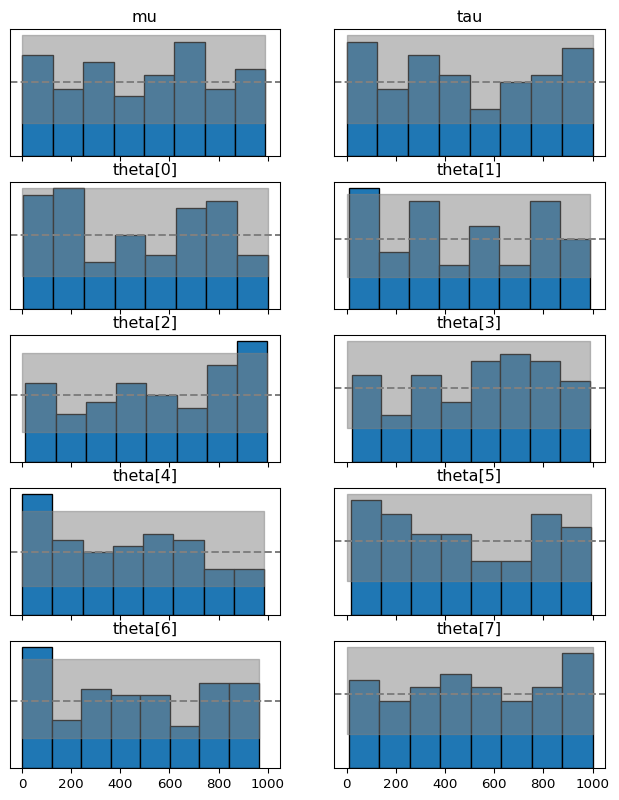

In [7]:
#| output: true
#| fig-cap: "Histogram plot of SBC results"
S.plot_results(kind = "hist")

/Users/trevormartin/Git_Tracked/CFA/FORECASTING_PIPELINES_AND_MAINTAINENCE/forecasttools-py/.venv/lib/python3.13/site-packages/arviz/plots/ecdfplot.py:288: FutureWarning: `pit` has been deprecated. Specify `values=cdf(values)` instead.
  warnings.warn(


(<Figure size 768x960 with 10 Axes>,
 array([<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'tau'}>,
        <Axes: title={'center': 'theta[0]'}>,
        <Axes: title={'center': 'theta[1]'}>,
        <Axes: title={'center': 'theta[2]'}>,
        <Axes: title={'center': 'theta[3]'}>,
        <Axes: title={'center': 'theta[4]'}>,
        <Axes: title={'center': 'theta[5]'}>,
        <Axes: title={'center': 'theta[6]'}>,
        <Axes: title={'center': 'theta[7]'}>], dtype=object))

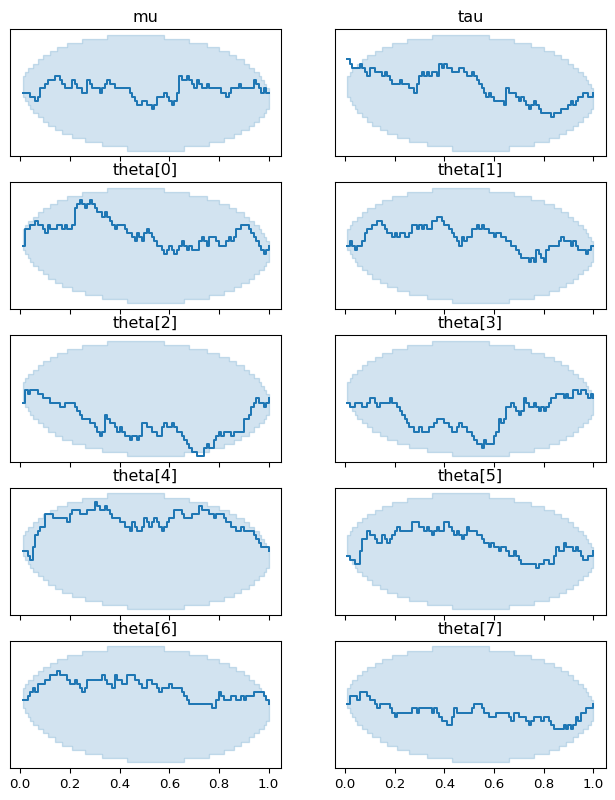

In [8]:
#| output: true
#| fig-cap: "ECDF/PIT plot of SBC results"
S.plot_results()

In [9]:
def eight_schools_lognormal_prior(J, sigma, y=None):
    mu = numpyro.sample('mu', dist.Normal(0, 5))
    tau = numpyro.sample('tau', dist.LogNormal(5, 1))
    with numpyro.plate('J', J):
        theta = numpyro.sample('theta', dist.Normal(mu, tau))
    numpyro.sample('obs', dist.Normal(theta, sigma), obs=y)

nuts_kernel_lognormal_prior = NUTS(eight_schools_lognormal_prior)

S2 = sbc.SBC(nuts_kernel_lognormal_prior, J, sigma,
    observed_vars = dict(y = "obs"),
    sample_kwargs=dict(num_warmup=500, num_samples=1000, progress_bar = False),
    num_simulations=100,
    seed = seed2)
S2.run_simulations()

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:01<01:43,  1.04s/it]

  2%|▏         | 2/100 [00:02<01:42,  1.05s/it]

  3%|▎         | 3/100 [00:03<01:38,  1.02s/it]

  4%|▍         | 4/100 [00:04<01:36,  1.00s/it]

  5%|▌         | 5/100 [00:05<01:34,  1.00it/s]

  6%|▌         | 6/100 [00:06<01:32,  1.01it/s]

  7%|▋         | 7/100 [00:06<01:31,  1.02it/s]

  8%|▊         | 8/100 [00:07<01:30,  1.02it/s]

  9%|▉         | 9/100 [00:09<01:34,  1.04s/it]

 10%|█         | 10/100 [00:10<01:37,  1.08s/it]

 11%|█         | 11/100 [00:11<01:40,  1.13s/it]

 12%|█▏        | 12/100 [00:12<01:37,  1.11s/it]

 13%|█▎        | 13/100 [00:14<01:50,  1.27s/it]

 14%|█▍        | 14/100 [00:16<02:07,  1.48s/it]

 15%|█▌        | 15/100 [00:17<02:05,  1.47s/it]

 16%|█▌        | 16/100 [00:18<01:52,  1.34s/it]

 17%|█▋        | 17/100 [00:19<01:43,  1.25s/it]

 18%|█▊        | 18/100 [00:20<01:37,  1.19s/it]

 19%|█▉        | 19/100 [00:22<01:37,  1.21s/it]

 20%|██        | 20/100 [00:23<01:37,  1.22s/it]

 21%|██        | 21/100 [00:24<01:30,  1.14s/it]

 22%|██▏       | 22/100 [00:25<01:24,  1.09s/it]

 23%|██▎       | 23/100 [00:26<01:26,  1.12s/it]

 24%|██▍       | 24/100 [00:27<01:26,  1.14s/it]

 25%|██▌       | 25/100 [00:28<01:22,  1.10s/it]

 26%|██▌       | 26/100 [00:29<01:19,  1.08s/it]

 27%|██▋       | 27/100 [00:30<01:18,  1.08s/it]

 28%|██▊       | 28/100 [00:31<01:17,  1.08s/it]

 29%|██▉       | 29/100 [00:32<01:15,  1.06s/it]

 30%|███       | 30/100 [00:33<01:12,  1.04s/it]

 31%|███       | 31/100 [00:34<01:10,  1.02s/it]

 32%|███▏      | 32/100 [00:36<01:15,  1.11s/it]

 33%|███▎      | 33/100 [00:37<01:11,  1.07s/it]

 34%|███▍      | 34/100 [00:38<01:11,  1.08s/it]

 35%|███▌      | 35/100 [00:39<01:17,  1.19s/it]

 36%|███▌      | 36/100 [00:40<01:19,  1.24s/it]

 37%|███▋      | 37/100 [00:41<01:13,  1.17s/it]

 38%|███▊      | 38/100 [00:42<01:09,  1.12s/it]

 39%|███▉      | 39/100 [00:43<01:05,  1.08s/it]

 40%|████      | 40/100 [00:45<01:04,  1.08s/it]

 41%|████      | 41/100 [00:46<01:03,  1.08s/it]

 42%|████▏     | 42/100 [00:47<01:05,  1.12s/it]

 43%|████▎     | 43/100 [00:48<01:02,  1.10s/it]

 44%|████▍     | 44/100 [00:49<01:01,  1.10s/it]

 45%|████▌     | 45/100 [00:50<00:59,  1.09s/it]

 46%|████▌     | 46/100 [00:51<00:57,  1.07s/it]

 47%|████▋     | 47/100 [00:52<00:55,  1.05s/it]

 48%|████▊     | 48/100 [00:53<00:56,  1.08s/it]

 49%|████▉     | 49/100 [00:54<00:53,  1.04s/it]

 50%|█████     | 50/100 [00:55<00:51,  1.03s/it]

 51%|█████     | 51/100 [00:56<00:52,  1.07s/it]

 52%|█████▏    | 52/100 [00:57<00:50,  1.05s/it]

 53%|█████▎    | 53/100 [00:59<00:50,  1.08s/it]

 54%|█████▍    | 54/100 [01:00<00:48,  1.05s/it]

 55%|█████▌    | 55/100 [01:01<00:46,  1.03s/it]

 56%|█████▌    | 56/100 [01:02<00:45,  1.02s/it]

 57%|█████▋    | 57/100 [01:03<00:45,  1.05s/it]

 58%|█████▊    | 58/100 [01:04<00:43,  1.03s/it]

 59%|█████▉    | 59/100 [01:05<00:41,  1.01s/it]

 60%|██████    | 60/100 [01:06<00:40,  1.02s/it]

 61%|██████    | 61/100 [01:07<00:40,  1.05s/it]

 62%|██████▏   | 62/100 [01:08<00:41,  1.10s/it]

 63%|██████▎   | 63/100 [01:09<00:42,  1.14s/it]

 64%|██████▍   | 64/100 [01:10<00:40,  1.11s/it]

 65%|██████▌   | 65/100 [01:11<00:37,  1.07s/it]

 66%|██████▌   | 66/100 [01:12<00:37,  1.11s/it]

 67%|██████▋   | 67/100 [01:14<00:37,  1.13s/it]

 68%|██████▊   | 68/100 [01:15<00:40,  1.28s/it]

 69%|██████▉   | 69/100 [01:18<00:49,  1.61s/it]

 70%|███████   | 70/100 [01:20<00:55,  1.86s/it]

 71%|███████   | 71/100 [01:22<00:54,  1.88s/it]

 72%|███████▏  | 72/100 [01:23<00:46,  1.65s/it]

 73%|███████▎  | 73/100 [01:24<00:39,  1.45s/it]

 74%|███████▍  | 74/100 [01:25<00:34,  1.31s/it]

 75%|███████▌  | 75/100 [01:26<00:30,  1.22s/it]

 76%|███████▌  | 76/100 [01:27<00:27,  1.16s/it]

 77%|███████▋  | 77/100 [01:28<00:27,  1.18s/it]

 78%|███████▊  | 78/100 [01:29<00:24,  1.14s/it]

 79%|███████▉  | 79/100 [01:30<00:22,  1.09s/it]

 80%|████████  | 80/100 [01:31<00:21,  1.06s/it]

 81%|████████  | 81/100 [01:32<00:19,  1.05s/it]

 82%|████████▏ | 82/100 [01:34<00:20,  1.15s/it]

 83%|████████▎ | 83/100 [01:35<00:20,  1.20s/it]

 84%|████████▍ | 84/100 [01:37<00:20,  1.28s/it]

 85%|████████▌ | 85/100 [01:38<00:19,  1.28s/it]

 86%|████████▌ | 86/100 [01:39<00:16,  1.21s/it]

 87%|████████▋ | 87/100 [01:40<00:14,  1.15s/it]

 88%|████████▊ | 88/100 [01:41<00:13,  1.11s/it]

 89%|████████▉ | 89/100 [01:42<00:11,  1.08s/it]

 90%|█████████ | 90/100 [01:43<00:10,  1.05s/it]

 91%|█████████ | 91/100 [01:44<00:09,  1.03s/it]

 92%|█████████▏| 92/100 [01:45<00:08,  1.02s/it]

 93%|█████████▎| 93/100 [01:46<00:07,  1.01s/it]

 94%|█████████▍| 94/100 [01:47<00:06,  1.02s/it]

 95%|█████████▌| 95/100 [01:48<00:05,  1.01s/it]

 96%|█████████▌| 96/100 [01:49<00:04,  1.00s/it]

 97%|█████████▋| 97/100 [01:50<00:02,  1.01it/s]

 98%|█████████▊| 98/100 [01:51<00:01,  1.02it/s]

 99%|█████████▉| 99/100 [01:52<00:00,  1.02it/s]

100%|██████████| 100/100 [01:53<00:00,  1.03s/it]

100%|██████████| 100/100 [01:53<00:00,  1.13s/it]

(<Figure size 768x960 with 10 Axes>,
 array([<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'tau'}>,
        <Axes: title={'center': 'theta[0]'}>,
        <Axes: title={'center': 'theta[1]'}>,
        <Axes: title={'center': 'theta[2]'}>,
        <Axes: title={'center': 'theta[3]'}>,
        <Axes: title={'center': 'theta[4]'}>,
        <Axes: title={'center': 'theta[5]'}>,
        <Axes: title={'center': 'theta[6]'}>,
        <Axes: title={'center': 'theta[7]'}>], dtype=object))

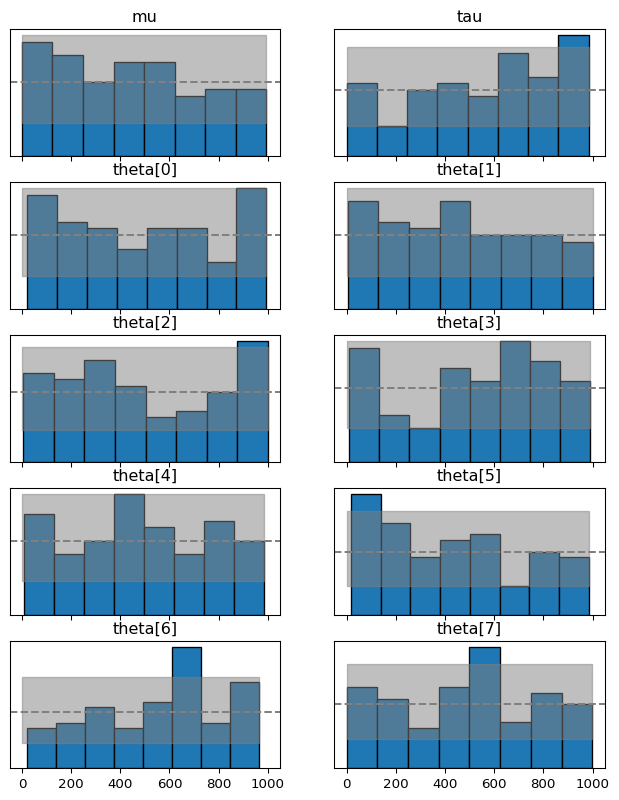

In [10]:
#| output: true
#| fig-cap: "Histogram plot of SBC results"
S2.plot_results(kind = "hist")

/Users/trevormartin/Git_Tracked/CFA/FORECASTING_PIPELINES_AND_MAINTAINENCE/forecasttools-py/.venv/lib/python3.13/site-packages/arviz/plots/ecdfplot.py:288: FutureWarning: `pit` has been deprecated. Specify `values=cdf(values)` instead.
  warnings.warn(


(<Figure size 768x960 with 10 Axes>,
 array([<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'tau'}>,
        <Axes: title={'center': 'theta[0]'}>,
        <Axes: title={'center': 'theta[1]'}>,
        <Axes: title={'center': 'theta[2]'}>,
        <Axes: title={'center': 'theta[3]'}>,
        <Axes: title={'center': 'theta[4]'}>,
        <Axes: title={'center': 'theta[5]'}>,
        <Axes: title={'center': 'theta[6]'}>,
        <Axes: title={'center': 'theta[7]'}>], dtype=object))

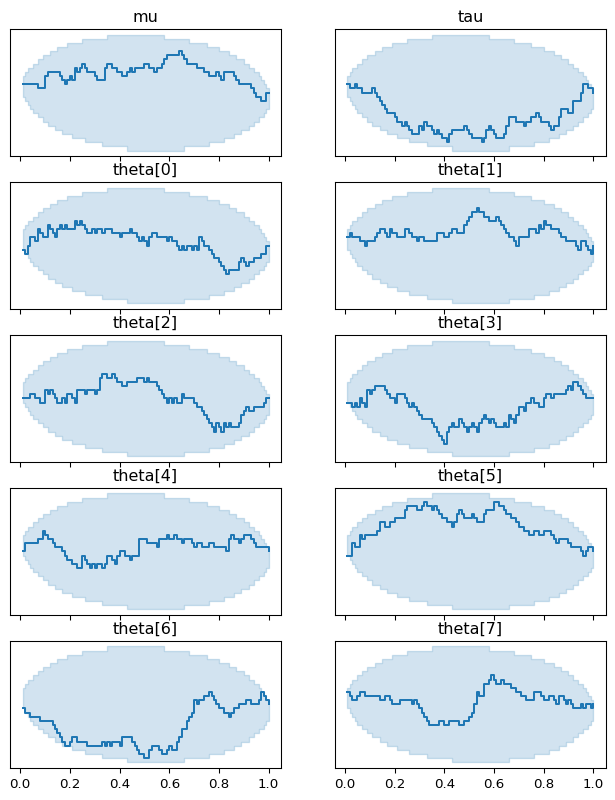

In [11]:
#| output: true
#| fig-cap: "ECDF/PIT plot of SBC results"
S2.plot_results()